## Assignment 4

This is assignment needs to be handed in on teams by midnight on Tuesday 18-10-2022.

The documents to hand in are:
- A jupyter notebook you used to execute the assignment. Including any files such as .csv files which you've accessed in the notebook.
- A pdf document of maximum 4 pages A4 Landscape (We will view it on screen so that's why we're sticking to landscape), in which you explain your process, the nature of the data you analysed, visualisations of the results, and the conclusions you were able to draw from this. 

#### The Assignment

You will have to find a dataset of your choice, and train a SOM on this dataset. Following this you will demonstrate you understand the nature of the SOM technology, and also the results it produces. Feel free to use any additional analysis methods to enrich your analysis.

## Assignment Prediction Method 1 - SOM(Self-organizing mapping neural network)

**INTRODUCTION**

File:Housing in south California in America
Description: housing property has become an important data in people's choose of living in the factors of location, age,housing qualities, density,incom, etc.And according to the housing data, we can predict some data such as the housing location and housing qualities which is suitable for your age, income,and family. Therefore, I used this data as the source of training to let machine predict your own remmondation of accommodation.


**## RESEARCH QUESTIONS:**
1. Does the housing location has relationship with population?
2. How is income condition in different ages in population? 
3. What is the trends of housing value with different location of ocean_proximity?
4. Do people will care about the housing value in different location?
5. Prediction：will people be willing to live nearbay,inland...of this town/city/location？Based on the data, what kind of location is suitable for specific people.

**## FEATURES:**

a.long. and lat.:the locaton in the map

b. housing median age

c.number of rooms and bedrooms

d. populaton in different lon and lat:density of people

e.households:family number

f.self_income: income of people that could afford the housing

g.house value

h.ocean_proximity(this data is a judge data):define the proximate location of housing

STEP ONE:IMPORT THE PACKAGES

Description:

In this step I will anaylse the basic information of data to test some script and trends or relationships that mey be related to my data. Therefore, I started with the most stright forward data-population to see the division of population.

In [4]:
import pandas as pd
import numpy as np
from sompy import SOMFactory
import random
import joblib
import glob
import matplotlib.pyplot as plt
import matplotlib
from sompy.visualization.plot_tools import plot_hex_map

CACHEDIR=C:\Users\DELL\.matplotlib
Using fontManager instance from C:\Users\DELL\.matplotlib\fontlist-v330.json
Loaded backend module://matplotlib_inline.backend_inline version unknown.
Loaded backend module://matplotlib_inline.backend_inline version unknown.


STEP TWO:CHECK AND READ THE FILE

In [5]:
dfO = pd.read_csv("housing.csv")
dfO

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [42]:
#file data test
dfO.loc[1]

longitude              -122.22
latitude                 37.86
housing_median_age          21
total_rooms               7099
total_bedrooms          1106.0
population                2401
households                1138
median_income           8.3014
median_house_value      358500
ocean_proximity       NEAR BAY
Name: 1, dtype: object

STEP THREE:BASIC DATA VISUALIZATION

1. Locate the position

As the map shown below, this dataset is collecting the housing from the south of America, therefore, it will only show this pat to show the basic information that data has

In [43]:
import folium

map_obj = folium.Map(location = [37.829108, -120.540993], zoom_start = 7)

map_obj

In [44]:
import pandas as pd
#read file
population_data = pd.read_csv("housing.csv")

#first 20 data
population_data.head(5)

#define the location,check the popultion with first 5
lats_longs_weight = list(map(list, zip(population_data["latitude"],
                          population_data["longitude"],
                          population_data["population"]
                         )
               )
           )
lats_longs_weight[:1]

#import folium
import folium
from folium.plugins import HeatMap

map_obj = folium.Map(location = [37.829108, -120.540993], zoom_start = 10)

HeatMap(lats_longs_weight).add_to(map_obj)

map_obj

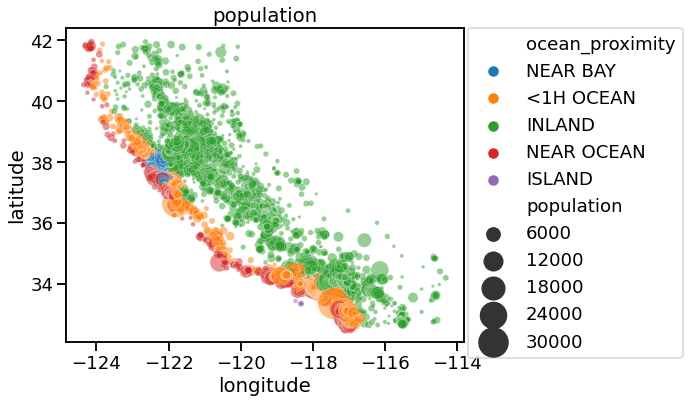

In [45]:
#visualize the data from the map
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(10,6))
sns.scatterplot(x="longitude", 
                y="latitude",
                size="population",
                sizes=(10,1000),
                alpha=0.5,
                hue="ocean_proximity",
                data=dfO)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

# Put the legend out of the figure
#plt.legend(bbox_to_anchor=(1.01, 0.54),  borderaxespad=0.)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("population")
plt.tight_layout()
 
plt.savefig("Bubble_plot_Seaborn_color_by_variable_Seaborn_scatterplot.png",
                    format='png',dpi=150)



Result:

As you can see, it is clear that bigger town contains higher population, which means that housing properties may impact with the population. However, let's keep moving.

2. How is income condition in different ages in population? 

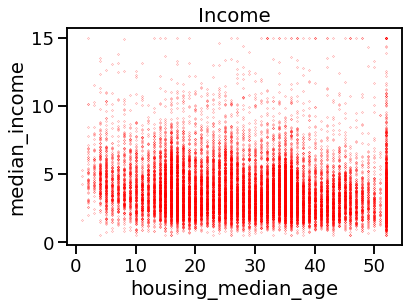

In [46]:
#fig = plt.figure(figsize=(20,20), dpi=200)
plt.scatter(dfO["housing_median_age"], dfO["median_income"], c='r', s=0.05) # 'r' is the color red, s=1 is the size
plt.xlabel('housing_median_age')
plt.ylabel('median_income')
plt.title('Income')
plt.show()

As you can see, the range of income is basically within 8, and income from different age is similar. Therefore, the age and income may impact with oher factors.

3. What is the trends of housing value with different location of ocean_proximity?

In [36]:
dfnew=dfO.groupby("ocean_proximity")
#group: combin dataframes.like all values of same name will be grouped(group from row index)
#groupby.mean():result will be the average after groupby
dfnew.mean()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,-118.847766,34.560577,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
INLAND,-119.732990,36.731829,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
ISLAND,-118.354000,33.358000,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,-122.260694,37.801057,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,-119.332555,34.738439,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


In [37]:
#   Test the data
dfMean=dfnew.mean()
dfMean.loc['INLAND','median_house_value']

124805.39200122119

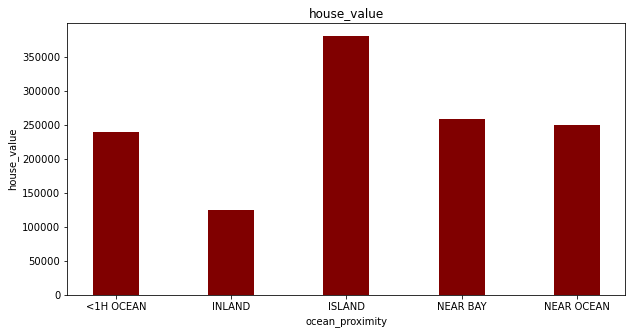

In [38]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'<1H OCEAN':dfMean.loc['<1H OCEAN','median_house_value'], 'INLAND':dfMean.loc['INLAND','median_house_value'], 'ISLAND':dfMean.loc['ISLAND','median_house_value'],
        'NEAR BAY':dfMean.loc['NEAR BAY','median_house_value'],'NEAR OCEAN':dfMean.loc['NEAR OCEAN','median_house_value']}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10,5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("ocean_proximity")
plt.ylabel("house_value")
plt.title("house_value")
plt.show()

Result:The location of housing has some relationship with housing value. Island has the highest price around the other locations. and it seems that it also have more housing number there.

**SOM Practice**：

**Fields description**
__________________________
1.	**lontitude**：-200
2.	**latitude**：-200
3.	**housing_median_age**:	1-100
4.	**total_rooms**:the number of rooms
5.  **total_bedrooms**:the number of bedrooms
6.	**population**:	the number of people
7.	**households**:	the number of members
8.	**median_income**:	the income of people
9.	**median_house_value**:	the house value(dollars)
10.	**ocean_proximity**:	the classified location that connected with ocean

In [40]:
# select the features that maybe related
df = dfO[["longitude","latitude", "housing_median_age","total_rooms", "population",
         "households", "median_income", "median_house_value", "ocean_proximity"]]

In [41]:
# fill the NaN with 0
df = df.fillna(0)

In [42]:
# select features for SOM to cluster
clustering_vars = ["longitude","latitude", "housing_median_age","total_rooms", "population",
         "households", "median_income", "median_house_value"]

In [43]:
# read data
data = df[clustering_vars].values

In [44]:
#name the title
names = clustering_vars
names

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [45]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,35682.000000,6082.000000,15.000100,500001.000000


**## train a SOM with features that we assume internal causes**

In [46]:
som = SOMFactory().build(data, mapsize=[40,40],
                            normalization = 'var', initialization='random', component_names=names, lattice="hexa")

In [47]:
%%time
som.train(n_job=10, verbose=False, train_rough_len=3, train_finetune_len=20)

CPU times: total: 1min 1s
Wall time: 6.42 s


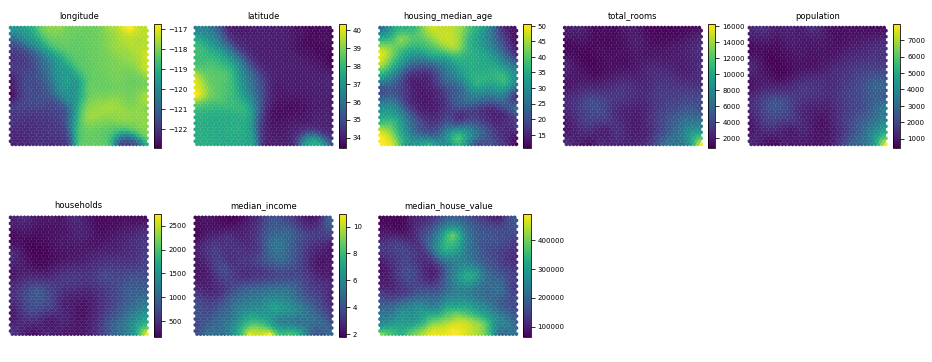

In [48]:
# visulization
from sompy.visualization.mapview import View2D
view2D  = View2D(40,40,"", text_size=7)
view2D.show(som, col_sz=5, which_dim="all", denormalize=True)
plt.show()

**## Sort data in a way according to BMU**

In [50]:
df.shape

(20640, 9)

In [51]:
# addtion of bmu indexes to data frame
df["bmus"] = som.project_data(data)
df.shape

(20640, 10)

In [52]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity', 'bmus'],
      dtype='object')

**Train more models and select the one with least error.**

I found that machine learning should be have a least error result, which is bwtter to describe

In [65]:
related_var = ["longitude","latitude", "housing_median_age","total_rooms", "population",
         "households", "median_income", "median_house_value"]
agg_method = {'longitude':'mean', 'latitude':'mean','housing_median_age':'mean','total_rooms':'mean','households':'mean','median_income':'sum','median_house_value':'sum','population':'sum'}
clustering_vars = ["longitude","latitude", "housing_median_age","total_rooms", "population",
         "households", "median_income", "median_house_value"]
map_size = [20, 20]

In [66]:
map_size_total = map_size[0] * map_size[1]
df = dfO[related_var]
data = dfO[clustering_vars].values
som = SOMFactory().build(data, mapsize=map_size,
                            normalization = 'var', initialization='random', component_names=clustering_vars, lattice="hexa")

In [67]:
%%time
som.train(n_job=12, train_rough_len=3, train_finetune_len=10)
topographic_error = som.calculate_topographic_error()
quantization_error = som.calculate_quantization_error()
print("topographic_error \tquantization_error")
print(str(topographic_error) + "\t" + str(quantization_error))

 Training...
 random_initialization took: 0.000000 seconds
 Rough training...
 radius_ini: 7.000000 , radius_final: 1.166667, trainlen: 3

 epoch: 1 ---> elapsed time:  0.098000, quantization error: 4.918804

 epoch: 2 ---> elapsed time:  0.119000, quantization error: 2.521180

 epoch: 3 ---> elapsed time:  0.102000, quantization error: 2.357937

 Finetune training...
 radius_ini: 1.666667 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  0.117000, quantization error: 1.412562

 epoch: 2 ---> elapsed time:  0.099000, quantization error: 1.460490

 epoch: 3 ---> elapsed time:  0.110000, quantization error: 1.377199

 epoch: 4 ---> elapsed time:  0.104000, quantization error: 1.322361

 epoch: 5 ---> elapsed time:  0.125000, quantization error: 1.275728

 epoch: 6 ---> elapsed time:  0.114000, quantization error: 1.231248

 epoch: 7 ---> elapsed time:  0.113000, quantization error: 1.187459

 epoch: 8 ---> elapsed time:  0.119000, quantization error: 1.144183

 epoch:

topographic_error 	quantization_error
9.689922480620155e-05	0.28710789642220996
CPU times: total: 16.4 s
Wall time: 2.03 s


In [68]:
df["bmus"] = som.project_data(data)
exogeneous_vars = [c for c in df.columns if not c in related_var + ["bmus"]] 
df = df[related_var + ["bmus"]]

C:\Users\DELL\AppData\Local\Temp\ipykernel_21516\3746647284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bmus"] = som.project_data(data)


In [69]:
empirical_codebookdf = df.groupby("bmus", as_index=True, dropna=True).agg(agg_method)
for i in range(map_size_total):
    if i not in empirical_codebookdf.index:
        empirical_codebookdf.loc[i] = [np.NaN for _ in range(len(related_var))]
empirical_codebookdf = empirical_codebookdf.sort_index()
empirical_codebook = empirical_codebookdf.values
print(empirical_codebookdf)

       longitude   latitude  housing_median_age  total_rooms  households  \
bmus                                                                       
0    -121.325047  38.055862           14.398119  1400.996865  214.021944   
1    -121.795741  38.162037           19.333333  1629.666667  301.351852   
2    -121.875873  38.542381           16.507937  1999.507937  360.920635   
3    -121.777705  39.218852           13.655738  2162.459016  385.278689   
4    -122.564653  40.223125           17.333333  2461.923611  452.118056   
...          ...        ...                 ...          ...         ...   
395  -117.908095  33.810667           32.809524  2584.152381  458.247619   
396  -118.055169  33.826854           28.146067  2582.707865  435.213483   
397  -118.049748  33.889664           25.319328  2523.563025  403.495798   
398  -117.994138  33.783793           22.422414  3279.750000  525.284483   
399  -117.778440  33.681078           14.266055  3152.424312  456.077982   

      media

Fix white empty block:

Some empty blocks shown in the diagram, this is because some data didnt find responded value in other plots. Therefore, missing data didn't shwo.I found a coding to fix it

In [70]:
import math

import numpy as np
import matplotlib as mpl
from matplotlib import cm, pyplot as plt
from matplotlib.collections import RegularPolyCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap

def my_plot_hex_map(d_matrix, titles=[], colormap=cm.gray, shape=[1, 1], comp_width=5, hex_shrink=1.0, fig=None,
                 colorbar=True):
    """
    Plot hexagon map where each neuron is represented by a hexagon. The hexagon
    color is given by the distance between the neurons (D-Matrix)

    Args:
    - grid: Grid dictionary (keys: centers, x, y ),
    - d_matrix: array contaning the distances between each neuron
    - w: width of the map in inches
    - title: map title

    Returns the Matplotlib SubAxis instance
    """

    d_matrix = np.flip(d_matrix, axis=0)

    def create_grid_coordinates(x, y):
        coordinates = [x for row in -1 * np.array(list(range(x))) for x in
                       list(zip(np.arange(((row) % 2) * 0.5, y + ((row) % 2) * 0.5), [0.8660254 * (row)] * y))]
        return (np.array(list(reversed(coordinates))), x, y)

    if d_matrix.ndim < 3:
        d_matrix = np.expand_dims(d_matrix, 2)

    if len(titles) != d_matrix.shape[2]:
        titles = [""] * d_matrix.shape[2]

    n_centers, x, y = create_grid_coordinates(*d_matrix.shape[:2])

    # Size of figure in inches
    if fig is None:
        xinch, yinch = comp_width * shape[1], comp_width * (x / y) * shape[0]
        fig = plt.figure(figsize=(xinch, yinch), dpi=72.)

    for comp, title in zip(range(d_matrix.shape[2]), titles):
        ax = fig.add_subplot(shape[0], shape[1], comp + 1, aspect='equal')

        # Get pixel size between two data points
        xpoints = n_centers[:, 0]
        ypoints = n_centers[:, 1]
        ax.scatter(xpoints, ypoints, s=0.0, marker='s')
        ax.axis([min(xpoints) - 1., max(xpoints) + 1.,
                 min(ypoints) - 1., max(ypoints) + 1.])

        xy_pixels = ax.transData.transform(np.vstack([xpoints, ypoints]).T)
        xpix, ypix = xy_pixels.T
        
        # fix colormap
        colormap = mpl.cm.get_cmap("plasma").copy()
        colormap.set_bad((0.0, 0.0, 0.0, 0.0))
        # discover radius and hexagon
        apothem = hex_shrink * (xpix[1] - xpix[0]) / math.sqrt(3)
        area_inner_circle = math.pi * (apothem ** 2)
        dm = d_matrix[:, :, comp].reshape(np.multiply(*d_matrix.shape[:2]))
        # draw good grids
        dmNanMean = np.array(dm, copy=True)  
        dmNanMean[np.isnan(dmNanMean)] = np.nanmean(dmNanMean)
        collection_bg = RegularPolyCollection(
            numsides=6,  # a hexagon
            rotation=0,
            sizes=(area_inner_circle,),
            array=dmNanMean,
            cmap=colormap,
            offsets=n_centers,
            transOffset=ax.transData,
        )
        ax.add_collection(collection_bg, autolim=True)
        # draw NaN grids
        dmNan = np.array(dm, copy=True)  
        dmNan[~np.isnan(dm)] = np.NaN
        dmNan[np.isnan(dm)] = 0
        colormapNan = mpl.cm.get_cmap("gray").copy()
        colormapNan.set_bad((0.0, 0.0, 0.0, 0.0))
        collection_bg_NaN = RegularPolyCollection(
            numsides=6,  # a hexagon
            rotation=0,
            sizes=(area_inner_circle,),
            array=dmNan,
            cmap=colormapNan,
            offsets=n_centers,
            transOffset=ax.transData,
        )
        ax.add_collection(collection_bg_NaN, autolim=True)


        ax.axis('off')
        ax.autoscale_view()
        ax.set_title(title)#, fontdict={"fontsize": 3 * comp_width})
        divider = make_axes_locatable(ax)
        
        cax = divider.append_axes("right", size="5%", pad=0.05)
        
        cbar = plt.colorbar(collection_bg_NaN, cax=cax)
        cbar = plt.colorbar(collection_bg, cax=cax)
        if not colorbar:
            cbar.remove()
        
        #cbar.ax.tick_params(labelsize=3 * comp_width)

    return ax, list(reversed(n_centers))

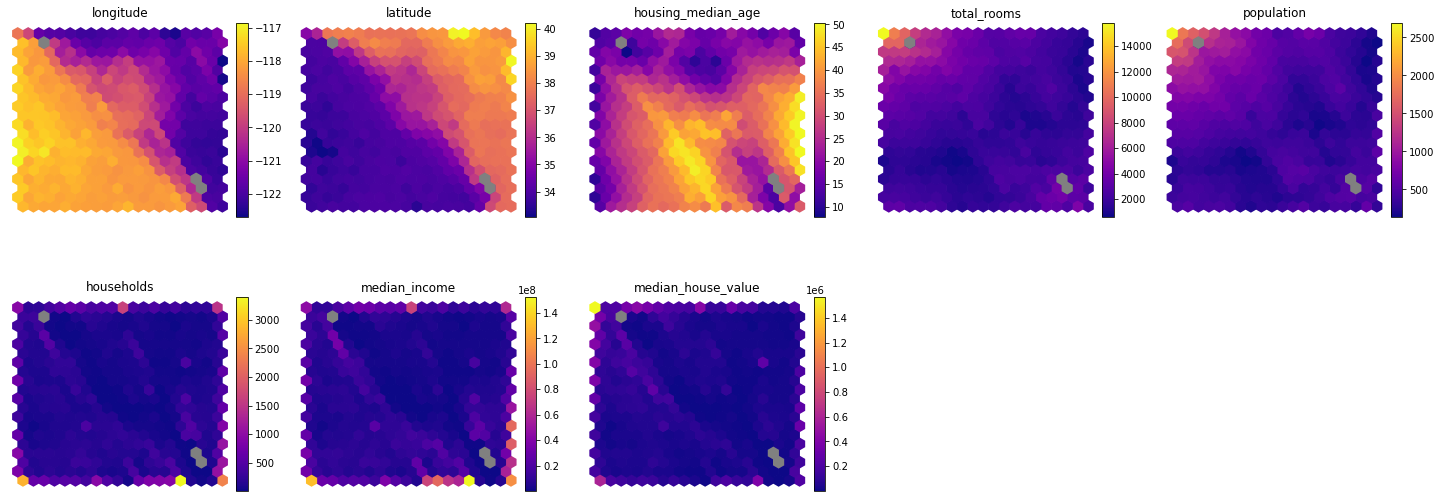

In [73]:
matplotlib.rcParams.update({'font.size': 10})

my_plot_hex_map(empirical_codebook.reshape(som.codebook.mapsize + [empirical_codebook.shape[-1]]), 
             titles=df.columns[:-1], shape=[20, 5], colormap=None)
plt.show()

Reference:https://github.com/JulianBesems/UD_IntroProject_2022/issues/2


**Another Method of machine learning - KNN**

reference:https://martin-thoma.com/comparing-classifiers/

In [61]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [62]:
dfTest=dfO
dfTest

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [63]:
dfTest.shape

(20640, 10)

In [64]:
X =dfTest[["longitude", "latitude"]].values
y = dfTest["ocean_proximity"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [66]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)

#Accuracy about the prediction
y_pred = neigh.predict(X_test)
accuracy_score(y_test, y_pred)

0.9847383720930233

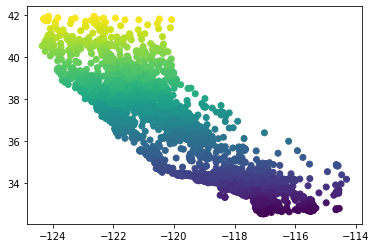

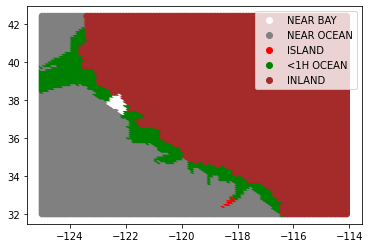

In [75]:
scatter=plt.scatter(X[:, 0], X[:, 1], marker='o', c=X[:, 1])#c means color
x_plot = []
x_plots = [[[i, j] for i in np.arange(-125, -114, 0.1)] for j in np.arange(32, 42.5, 0.1)]
for ls in x_plots:
    x_plot += ls
y_plot = neigh.predict(x_plot)

# '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'

fig, ax = plt.subplots()
plot_x = [dot[0] for dot in x_plot]
plot_y = [dot[1] for dot in x_plot]

df = pd.DataFrame(
    list(zip(plot_x, plot_y, y_plot)), 
    columns =['x', 'y', 'label']
) 
mydict = {'NEAR BAY': 'white',
          'NEAR OCEAN': 'grey',
          'ISLAND': 'red',
          '<1H OCEAN': 'green',
          'INLAND': 'brown'}

legendhandle = [plt.plot([], marker="o", ls="", color=color)[0] for color in list(mydict.values())]
plt.scatter(df.x, df.y, c=df['label'].map(mydict))
plt.legend(legendhandle,list(mydict.keys()),loc="upper right", frameon=True)
plt.show()